In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
print(plt.style.available)
plt.style.use('bmh')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [15]:
df = pd.read_csv(r"C:\Masterpiece By Nickopusan\Document\Tesla\Tesla stocks raw.csv")

In [16]:
print(f"This data have {df.shape[0]} rows, {df.shape[1]} columns, {df.duplicated().sum()} duplicate, and null : \n{df.isnull().sum()}")

This data have 3680 rows, 7 columns, 0 duplicate, and null : 
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [17]:
# make it datetime format and create year column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df = df.sort_values(by='Date')
df.set_index('Date', inplace=True)

In [18]:
df

,Open,High,Low,Close,Adj Close,Volume,Year
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,2010
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,2010
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,2010
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,2010
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,2010
...,...,...,...,...,...,...,...
2025-02-06,373.029999,375.399994,363.179993,374.320007,374.320007,77918200,2025
2025-02-07,370.190002,380.549988,360.339996,361.619995,361.619995,70298300,2025
2025-02-10,356.209991,362.700012,350.510010,350.730011,350.730011,77514900,2025


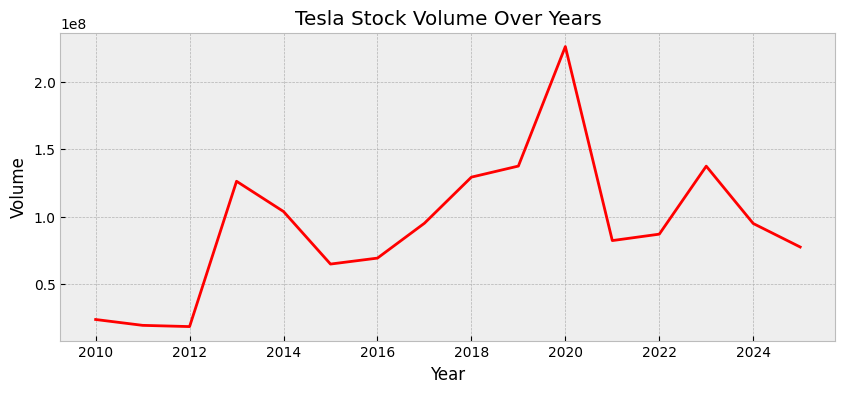

In [19]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df,x='Year', y='Volume', color='red', ci=None)
plt.grid(True)
plt.title("Tesla Stock Volume Over Years")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show()

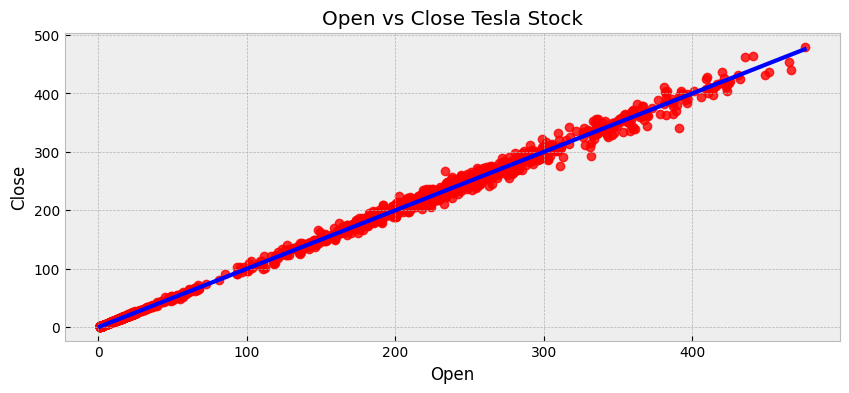

In [20]:
plt.figure(figsize=(10,4))
sns.regplot(data=df, x='Open', y='Close', scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.title("Open vs Close Tesla Stock")
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

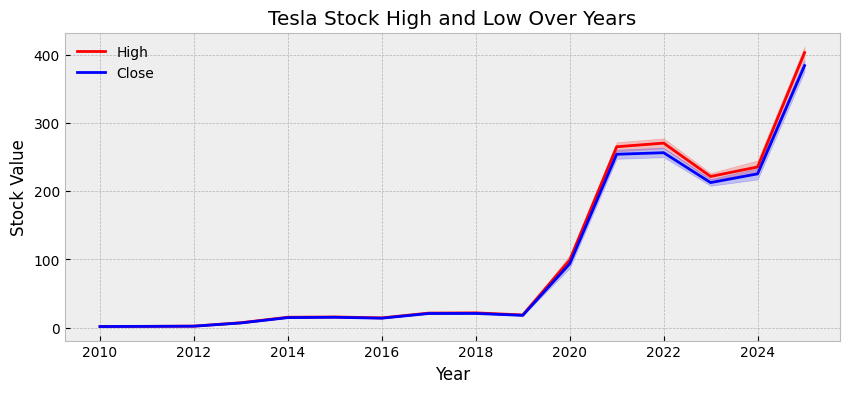

In [21]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='Year', y='High',label='High', color='red')
sns.lineplot(data=df, x='Year', y='Low',label='Close', color='blue')
plt.legend(fontsize=10, loc="upper left", frameon=False)
plt.grid(True)
plt.title("Tesla Stock High and Low Over Years")
plt.xlabel("Year")
plt.ylabel("Stock Value")
plt.show()

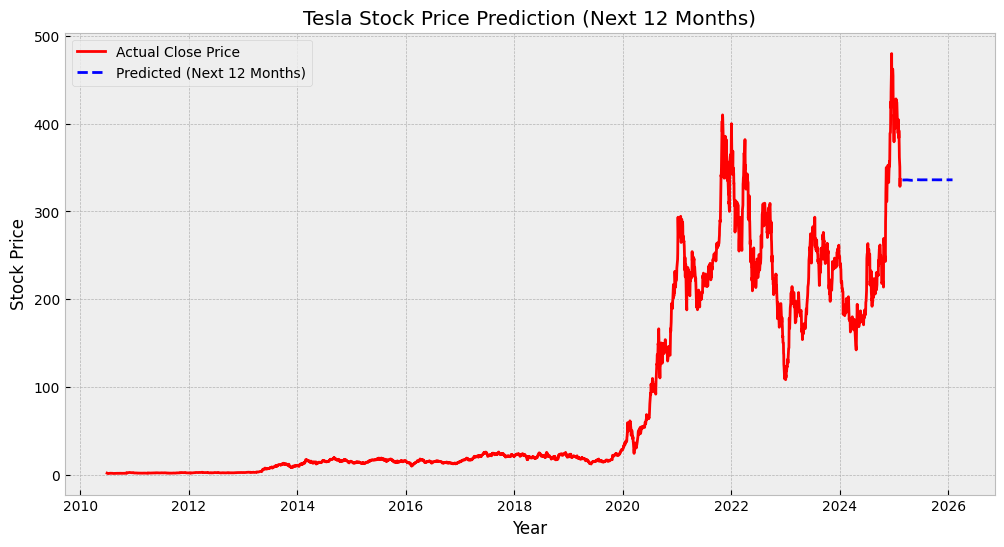

In [22]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['Close'], order=(5,1,0))  # (p,d,q) parameters can be optimized
fitted_model = model.fit()

# Predict next 12 months
future_dates = pd.date_range(start=df.index[-1], periods=12, freq='M')
forecast_12m = fitted_model.forecast(steps=12)

# Plot actual and predicted values
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y=df['Close'], label="Actual Close Price", color="red")
sns.lineplot(x=future_dates, y=forecast_12m, label="Predicted (Next 12 Months)", color="blue", linestyle="dashed")

plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price Prediction (Next 12 Months)")
plt.legend()
plt.show()

In [23]:
forecast

NameError: name 'forecast' is not defined